<a href="https://colab.research.google.com/github/navneetdavang/tsf_grip_data_science_tasks/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Prediction**

**Name :** Navneet Pandurang Davang <br>
**Class :** BE  **Div :** B <br>
**Roll No. :** 41209

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# About The Dataset
* **Age** : Age of the patient
* **Sex** : Sex of the patient (1 = male, 0 = female)
* **exang**: exercise induced angina (1 = yes; 0 = no)
* **ca**: number of major vessels (0-3)
* **cp** : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps** : resting blood pressure (in mm Hg)
* **chol** : cholestoral in mg/dl fetched via BMI sensor
* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg** : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** : maximum heart rate achieved
* **target** : 0 = less chance of heart attack, 1 = more chance of heart attack**

In [3]:
df = pd.read_csv("/content/heart.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset***

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


***Checking the shape (size) of dataset***

In [5]:
df.shape

(303, 14)

***Checking the columns' data types***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***Getting the statistical summary of dataset***

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Data Cleaning

***Checking for the missing values***

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

***Checking for the duplicates***

In [9]:
df.duplicated().sum()

1

***Handling the duplicates***

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


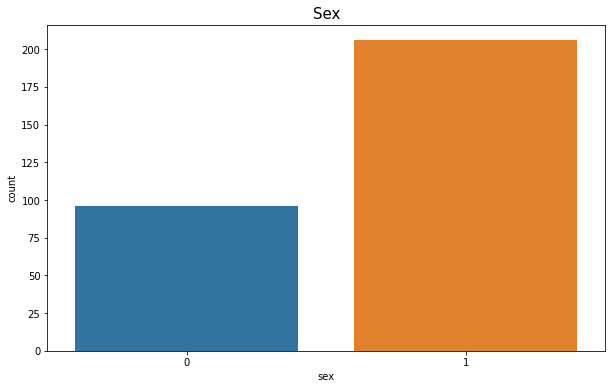

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df["sex"])
plt.title("Sex", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


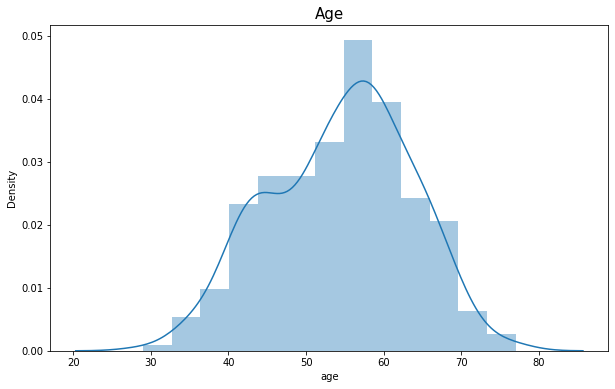

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"])
plt.title("Age", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


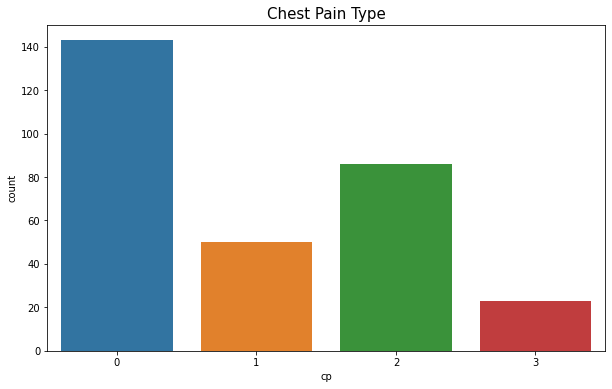

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df["cp"])
plt.title("Chest Pain Type", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


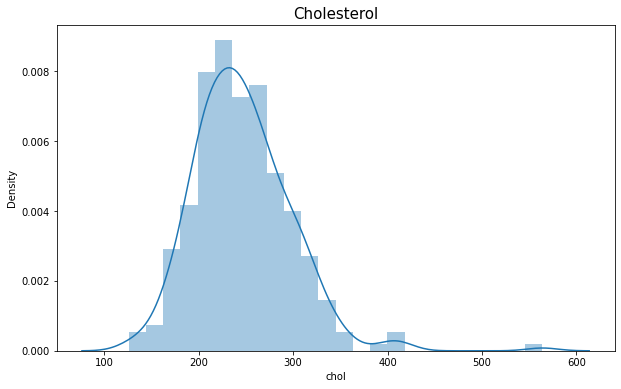

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df["chol"])
plt.title("Cholesterol", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


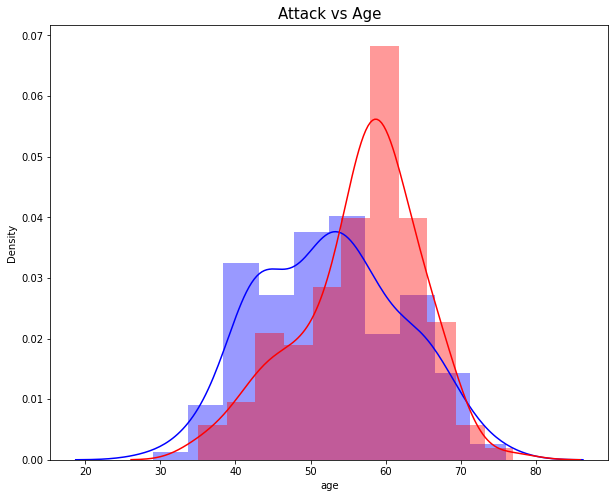

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["age"], color="blue")
sns.distplot(df[df["output"]==0]["age"], color="red")
plt.title("Attack vs Age", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


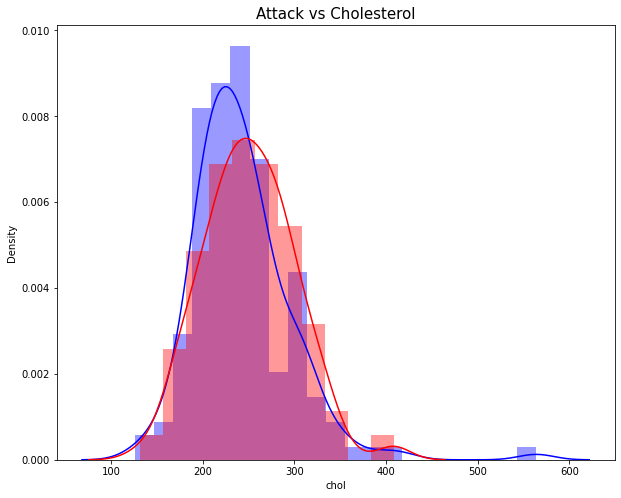

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["chol"], color="blue")
sns.distplot(df[df["output"]==0]["chol"], color="red")
plt.title("Attack vs Cholesterol", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


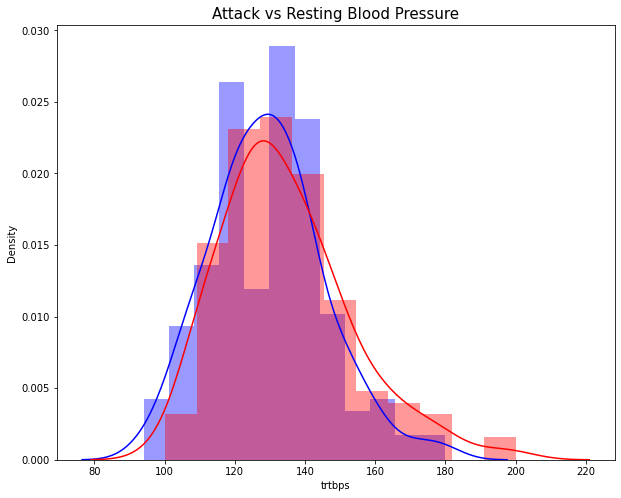

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["output"]==1]["trtbps"], color="blue")
sns.distplot(df[df["output"]==0]["trtbps"], color="red")
plt.title("Attack vs Resting Blood Pressure", size=15)
plt.show()

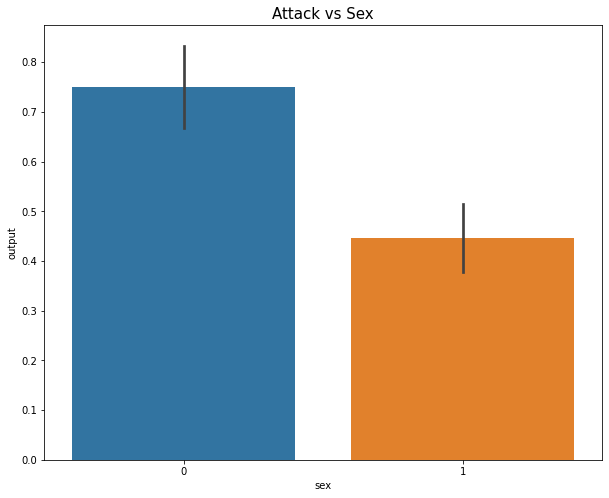

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["sex"], y=df["output"])
plt.title("Attack vs Sex", size=15)
plt.show()

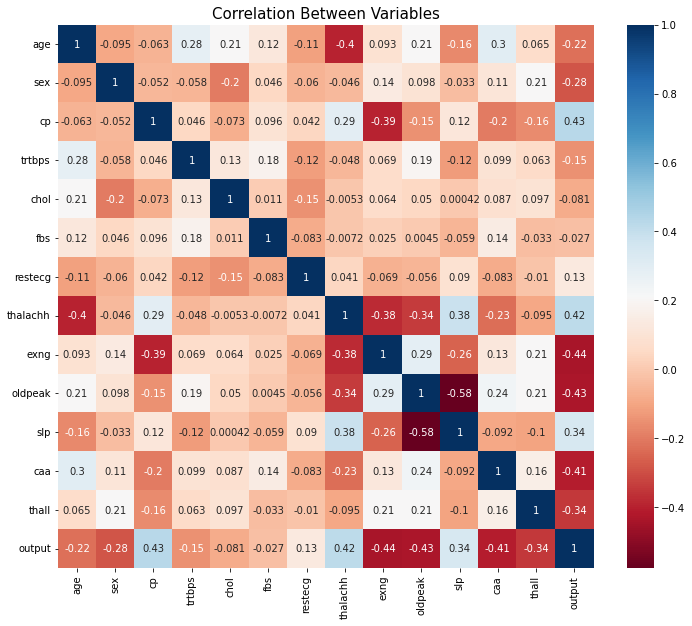

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

# Data Preprocessing

***Split the data into X, y datasets***

In [21]:
X = df.drop("output", axis=1)
y = df["output"]

***Standardizing the data***

In [22]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [23]:
X = pd.DataFrame(X, columns=df.drop("output", axis=1).columns)
y = pd.DataFrame(y, columns=["output"])

***Train-Test split***

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Machine Learning Models

In [25]:
models = pd.DataFrame(columns=["Model","Accuracy Score"])

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("LogisticRegression: ", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

LogisticRegression:  0.8131868131868132


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

KNeighborsClassifier:  0.8571428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


***Optimizing the KNN Model***

In [28]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    predictions = knn2.predict(X_test)
    score_list.append(accuracy_score(predictions, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Score')

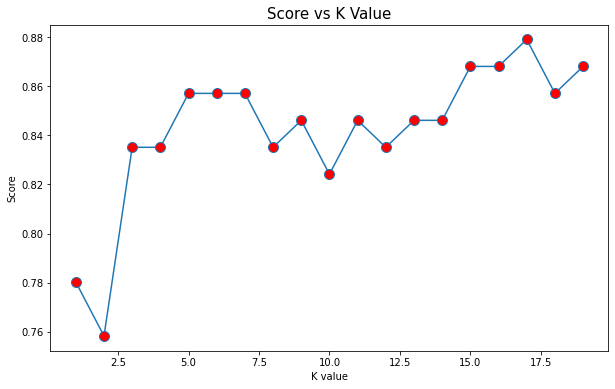

In [29]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

***The K value that we get the highest accuracy score with is 17, so we are setting the "n_neighbors" parameter to 17***

In [30]:
knn3 = KNeighborsClassifier(n_neighbors=17)
knn3.fit(X_train, y_train)
predictions = knn3.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

new_row = {"Model": "KNeighborsClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

KNeighborsClassifier:  0.8791208791208791


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Comparison of Machine Learning Models

In [31]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,KNeighborsClassifier,0.879121
0,LogisticRegression,0.813187
